In [461]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
df=pd.read_csv(r'C:\Users\USER\Downloads\3ad4391cabf711ec\dataset\test.csv')
tf=pd.read_csv(r'C:\Users\USER\Downloads\3ad4391cabf711ec\dataset\train.csv')
sf=pd.read_csv(r'C:\Users\USER\Downloads\3ad4391cabf711ec\dataset\sample_submission.csv')
#test file to df,train file to tf and sample file in sf

In [462]:
#data preparation

In [463]:
df.head()


,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [464]:
tf.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [465]:
sf.head()

,customer_id,credit_card_default
0,CST_115179,1
1,CST_121920,0
2,CST_109330,0
3,CST_128288,0
4,CST_151355,0


In [466]:
df.shape

(11383, 18)

In [467]:
df.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
count,11383.000000,11193.000000,1.138300e+04,11278.000000,11352.000000,11357.000000,11361.000000,11383.000000,11383.000000,11380.000000,11383.000000,11383.000000
mean,39.073004,0.419012,1.987084e+05,65519.798280,2.157593,0.178040,32078.968043,42972.207247,51.780989,784.389455,0.058069,0.048669
std,9.572474,0.727709,1.151905e+05,137572.106971,0.917391,0.382563,17417.412533,29325.712903,29.386130,100.468636,0.260202,0.215185
min,23.000000,0.000000,3.030994e+04,-3.000000,1.000000,0.000000,2371.740000,3604.650000,0.000000,500.000000,0.000000,0.000000
25%,31.000000,0.000000,1.274479e+05,934.250000,2.000000,0.000000,19522.320000,24148.525000,26.000000,705.000000,0.000000,0.000000
50%,39.000000,0.000000,1.728695e+05,2216.000000,2.000000,0.000000,29246.110000,35793.490000,53.000000,787.000000,0.000000,0.000000
75%,47.000000,1.000000,2.402339e+05,5517.000000,3.000000,0.000000,40729.260000,53527.890000,78.000000,870.000000,0.000000,0.000000
max,55.000000,11.000000,2.472450e+06,365252.000000,13.000000,1.000000,280114.740000,421517.090000,99.000000,949.000000,2.000000,1.000000


In [468]:
df.nunique()

customer_id                11383
name                        2459
age                           33
gender                         3
owns_car                       2
owns_house                     2
no_of_children                 8
net_yearly_income          11380
no_of_days_employed         4558
occupation_type               19
total_family_members           9
migrant_worker                 2
yearly_debt_payments       11346
credit_limit               11372
credit_limit_used(%)         100
credit_score                 449
prev_defaults                  3
default_in_last_6months        2
dtype: int64

In [469]:
df.dtypes

customer_id                 object
name                        object
age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
dtype: object

In [470]:
#data exploration

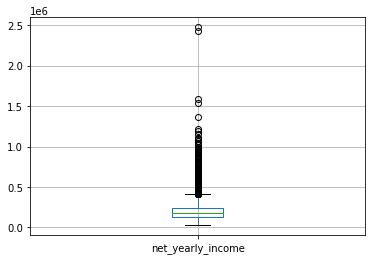

In [471]:
boxplot = df.boxplot(column=['net_yearly_income']) 

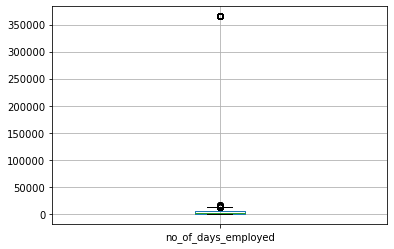

In [472]:
boxplot = df.boxplot(column=['no_of_days_employed']) 

has outliers

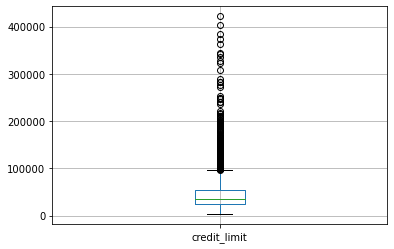

In [473]:
boxplot = df.boxplot(column=['credit_limit']) 

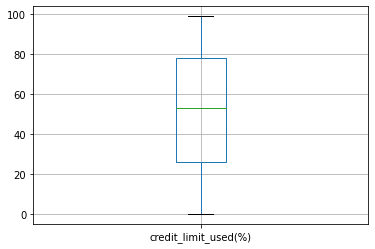

In [474]:
boxplot = df.boxplot(column=['credit_limit_used(%)']) 

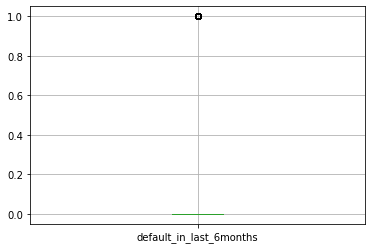

In [475]:
boxplot = df.boxplot(column=['default_in_last_6months']) 

In [476]:
#cheching for null value

In [477]:
df.isna().sum()  

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   132
owns_house                   0
no_of_children             190
net_yearly_income            0
no_of_days_employed        105
occupation_type              0
total_family_members        31
migrant_worker              26
yearly_debt_payments        22
credit_limit                 0
credit_limit_used(%)         0
credit_score                 3
prev_defaults                0
default_in_last_6months      0
dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_of_children', ylabel='Density'>

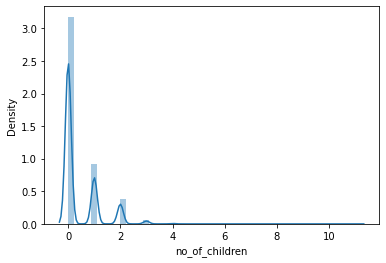

In [478]:
sns.distplot(df.no_of_children)

In [479]:
#no of children is a positive skwed matrix.hence replacing with median
df['no_of_children'].fillna(value = df['no_of_children'].median(), inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_of_days_employed', ylabel='Density'>

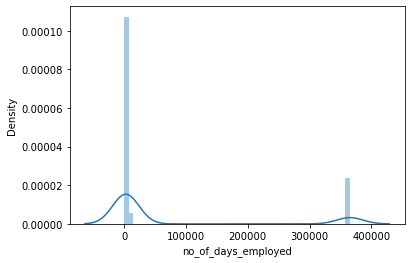

In [480]:
sns.distplot(df.no_of_days_employed)

In [481]:
#no of employed  is a positive skwed matrix.hence replacing with median
df['no_of_days_employed'].fillna(value = df['no_of_days_employed'].median(), inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_family_members', ylabel='Density'>

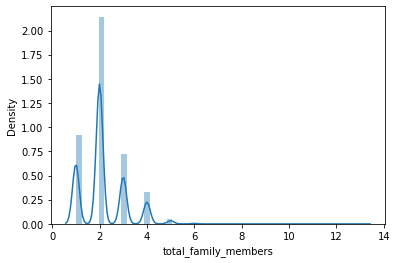

In [482]:
sns.distplot(df.total_family_members)

In [483]:
#total family  is a positive skwed matrix.hence replacing with median
df['total_family_members'].fillna(value = df['total_family_members'].median(), inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='migrant_worker', ylabel='Density'>

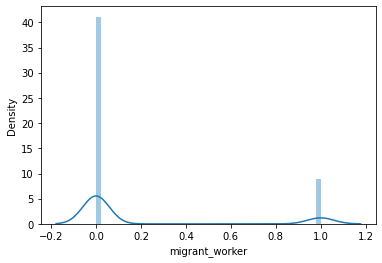

In [484]:
sns.distplot(df.migrant_worker)

In [485]:
#migrant worker  is a positive skwed matrix.hence replacing with median
df['migrant_worker'].fillna(value = df['migrant_worker'].median(), inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yearly_debt_payments', ylabel='Density'>

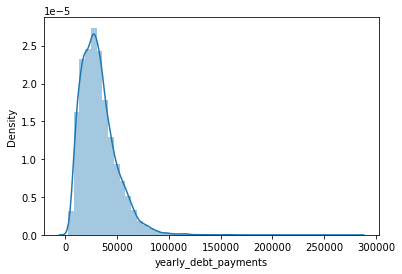

In [486]:
sns.distplot(df.yearly_debt_payments)

In [487]:
#yearly_debt_payments  is a positive skwed matrix.hence replacing with median
df['yearly_debt_payments'].fillna(value = df['yearly_debt_payments'].median(), inplace = True)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_score', ylabel='Density'>

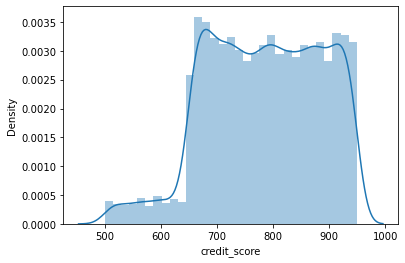

In [488]:
sns.distplot(df.credit_score)

In [489]:
#credit score  is a negative skwed matrix.hence replacing with mean
df['credit_score'].fillna(value = df['credit_score'].mean(), inplace = True)

In [490]:
#owns car is a categorical value so replacing with mode
df['owns_car'] = df['owns_car'].fillna(df['owns_car'].mode()[0])
df.isna().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
dtype: int64

In [491]:
#found that many features are not of same scale.hence standardising it
from sklearn import preprocessing
n=df[['credit_limit'] ]
m=df[['no_of_days_employed']]
o=df[['yearly_debt_payments']]
p=df[['net_yearly_income']]
q=df[['credit_score']]
Standardisation = preprocessing.StandardScaler()
# Scaled feature
df['credit_limit']= Standardisation.fit_transform(n)
df['no_of_days_employed']= Standardisation.fit_transform(m)
df['yearly_debt_payments']= Standardisation.fit_transform(o)
df['net_yearly_income']= Standardisation.fit_transform(p)
df['credit_score']= Standardisation.fit_transform(q)

In [492]:
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,0.294587,-0.466483,Unknown,2.0,0.0,-1.015316,-0.560891,4,-0.053653,0,0
1,CST_129215,Scott,48,F,N,N,1.0,0.743917,-0.464002,Unknown,3.0,0.0,1.460122,0.887537,70,0.215135,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,-0.427911,-0.464936,Unknown,3.0,0.0,-0.601283,-0.606471,71,-2.552384,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,-0.332254,-0.470094,Laborers,2.0,1.0,-0.177166,-0.470353,9,0.304731,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,0.301878,-0.472619,Laborers,2.0,1.0,1.272408,1.342213,82,-1.706200,1,1


In [493]:
df.dtypes

customer_id                 object
name                        object
age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
dtype: object

In [494]:
#prparing customer id for encoding
df['customer_id']=df['customer_id'].str[4:].astype(int)
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,142525,Siva,52,F,Y,N,0.0,0.294587,-0.466483,Unknown,2.0,0.0,-1.015316,-0.560891,4,-0.053653,0,0
1,129215,Scott,48,F,N,N,1.0,0.743917,-0.464002,Unknown,3.0,0.0,1.460122,0.887537,70,0.215135,0,0
2,138443,Victoria,50,F,N,N,1.0,-0.427911,-0.464936,Unknown,3.0,0.0,-0.601283,-0.606471,71,-2.552384,2,0
3,123812,John McCrank,30,F,N,N,1.0,-0.332254,-0.470094,Laborers,2.0,1.0,-0.177166,-0.470353,9,0.304731,0,0
4,144450,Martinne,52,M,N,Y,0.0,0.301878,-0.472619,Laborers,2.0,1.0,1.272408,1.342213,82,-1.706200,1,1


In [495]:
#name is not a neccessary feature.for dropping it
df=df.drop(['name'], axis = 1)
df.head()

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,142525,52,F,Y,N,0.0,0.294587,-0.466483,Unknown,2.0,0.0,-1.015316,-0.560891,4,-0.053653,0,0
1,129215,48,F,N,N,1.0,0.743917,-0.464002,Unknown,3.0,0.0,1.460122,0.887537,70,0.215135,0,0
2,138443,50,F,N,N,1.0,-0.427911,-0.464936,Unknown,3.0,0.0,-0.601283,-0.606471,71,-2.552384,2,0
3,123812,30,F,N,N,1.0,-0.332254,-0.470094,Laborers,2.0,1.0,-0.177166,-0.470353,9,0.304731,0,0
4,144450,52,M,N,Y,0.0,0.301878,-0.472619,Laborers,2.0,1.0,1.272408,1.342213,82,-1.706200,1,1


In [496]:
#onehot encoding remaining object types
df=pd.get_dummies(df,columns=["gender", "owns_car","owns_house","occupation_type"], prefix=["gender", "car","house","occu_type"])
df.dtypes

customer_id                          int32
age                                  int64
no_of_children                     float64
net_yearly_income                  float64
no_of_days_employed                float64
total_family_members               float64
migrant_worker                     float64
yearly_debt_payments               float64
credit_limit                       float64
credit_limit_used(%)                 int64
credit_score                       float64
prev_defaults                        int64
default_in_last_6months              int64
gender_F                             uint8
gender_M                             uint8
gender_XNA                           uint8
car_N                                uint8
car_Y                                uint8
house_N                              uint8
house_Y                              uint8
occu_type_Accountants                uint8
occu_type_Cleaning staff             uint8
occu_type_Cooking staff              uint8
occu_type_C

In [497]:
#now taking the training data for preparation
tf.dtypes

customer_id                 object
name                        object
age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
credit_card_default          int64
dtype: object

In [498]:
#finding null values
tf.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [499]:
#replacing null values with mean in a negative skewed graph,with median in positive skwed graph and categorical data with mode
tf['owns_car'] = tf['owns_car'].fillna(tf['owns_car'].mode()[0])
tf['no_of_children'].fillna(value = tf['no_of_children'].median(), inplace = True)
tf['no_of_days_employed'].fillna(value = tf['no_of_days_employed'].median(), inplace = True)
tf['total_family_members'].fillna(value = tf['total_family_members'].median(), inplace = True)
tf['migrant_worker'].fillna(value = tf['migrant_worker'].median(), inplace = True)
tf['yearly_debt_payments'].fillna(value = tf['yearly_debt_payments'].median(), inplace = True)
tf['credit_score'].fillna(value = tf['credit_score'].mean(), inplace = True)
tf.isna().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [500]:
#dropping the name since is not required
tf=tf.drop(['name'], axis = 1)
tf.head()

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [501]:
#one hot encoding 
tf=pd.get_dummies(tf,columns=["gender", "owns_car","owns_house","occupation_type"], prefix=["gender", "car","house","occu_type"])
tf.dtypes

customer_id                         object
age                                  int64
no_of_children                     float64
net_yearly_income                  float64
no_of_days_employed                float64
total_family_members               float64
migrant_worker                     float64
yearly_debt_payments               float64
credit_limit                       float64
credit_limit_used(%)                 int64
credit_score                       float64
prev_defaults                        int64
default_in_last_6months              int64
credit_card_default                  int64
gender_F                             uint8
gender_M                             uint8
gender_XNA                           uint8
car_N                                uint8
car_Y                                uint8
house_N                              uint8
house_Y                              uint8
occu_type_Accountants                uint8
occu_type_Cleaning staff             uint8
occu_type_C

In [502]:
#converting customer id into int
tf['customer_id']=tf['customer_id'].str[4:].astype(int)
tf.dtypes

customer_id                          int32
age                                  int64
no_of_children                     float64
net_yearly_income                  float64
no_of_days_employed                float64
total_family_members               float64
migrant_worker                     float64
yearly_debt_payments               float64
credit_limit                       float64
credit_limit_used(%)                 int64
credit_score                       float64
prev_defaults                        int64
default_in_last_6months              int64
credit_card_default                  int64
gender_F                             uint8
gender_M                             uint8
gender_XNA                           uint8
car_N                                uint8
car_Y                                uint8
house_N                              uint8
house_Y                              uint8
occu_type_Accountants                uint8
occu_type_Cleaning staff             uint8
occu_type_C

In [503]:
#standardisation of train data
from sklearn import preprocessing
n=tf[['credit_limit'] ]
m=tf[['no_of_days_employed']]
o=tf[['yearly_debt_payments']]
p=tf[['net_yearly_income']]
q=tf[['credit_score']]
Standardisation = preprocessing.StandardScaler()
# Scaled feature
tf['credit_limit']= Standardisation.fit_transform(n)
tf['no_of_days_employed']= Standardisation.fit_transform(m)
tf['yearly_debt_payments']= Standardisation.fit_transform(o)
tf['net_yearly_income']= Standardisation.fit_transform(p)
tf['credit_score']= Standardisation.fit_transform(q)

In [504]:
#splitting into x and y
x = tf
y = tf['credit_card_default']

In [505]:
x.shape

(45528, 40)

In [506]:
y.shape

(45528,)

In [507]:
#test and train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.30)

In [508]:
x_train.shape

(31869, 40)

In [509]:
y_train.shape

(31869,)

In [511]:
y_test.shape

(13659,)

In [512]:
#since it is a discreet variable output.logistic regression is best.it is most useful for understanding the influence of several independant variables on a single outcome
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = model.predict(x_test)

In [513]:
from sklearn import metrics
print('f1 score = ',100* metrics.f1_score(y_test,pred,average='macro'))

f1 score =  96.3896025628826


In [ ]:
#got an accuracy of 96%

In [514]:
#preparing the sample dataset
sf=sf.drop([0,1,2,3,4])
sf.head()

,customer_id,credit_card_default


In [522]:
sf['credit_card_default']=pred

sf['customer_id']="CST_"+tf['customer_id'].astype('str')


In [523]:
sf.head()

,customer_id,credit_card_default
0,CST_115179,0
1,CST_121920,0
2,CST_109330,0
3,CST_128288,0
4,CST_151355,0


In [524]:
sf.to_csv(r'C:\Users\USER\Downloads\3ad4391cabf711ec\dataset\sample_submission2.csv')